# Experiment Evaluation
Look at experiment results, compare them and find representative examples for the thesis motivation.

In [2]:
import os
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp

from enhancing_sgmcmc.utils import (
    run_experiment,
    plot_gmm_sampling,
    load_experiment_data,
    plot_combined_metric_comparison,
)

In [3]:
os.chdir("..")

In [4]:
%load_ext autoreload
%autoreload 2

## Unimodal Example
### Load Experiment Results

In [5]:
experiment_name = "unimodal_gaussian"
df = load_experiment_data(experiment_name)

In [6]:
df

,data_config_id,experiment_id,experiment_name,seed,data_covs,data_means,data_num_samples,data_weights,burnin,init_m,...,mresampling,n_batches,step_size,nll,wasserstein,results_plot_path,results_runtime_seconds,results_trajectory_path,file,preconditioned
0,0,20250426_175053,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.01,4.169772,0.000015,results\unimodal_gaussian\data_1724a4\1\202504...,15.100956,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,False
1,0,20250426_175120,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.01,3.723152,0.000024,results\unimodal_gaussian\data_1724a4\1\202504...,13.331179,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,False
2,0,20250426_175150,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.05,3.908174,0.000019,results\unimodal_gaussian\data_1724a4\1\202504...,17.294790,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,False
3,0,20250426_175221,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.05,4.078130,0.000015,results\unimodal_gaussian\data_1724a4\1\202504...,17.156198,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,False
4,0,20250426_175251,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[0.9985799789428711, 0.9780710339546204]",...,0.0,5,0.01,4.176009,0.000015,results\unimodal_gaussian\data_1724a4\1\202504...,17.763464,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,True
5,0,20250426_175321,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[0.9985799789428711, 0.9780710339546204]",...,0.0,5,0.01,3.728651,0.000024,results\unimodal_gaussian\data_1724a4\1\202504...,17.021954,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,True
6,0,20250426_175351,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[0.9985799789428711, 0.9780710339546204]",...,0.0,5,0.05,3.927309,0.000018,results\unimodal_gaussian\data_1724a4\1\202504...,16.699975,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,True
7,0,20250426_175420,unimodal_gaussian,1,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[0.9985799789428711, 0.9780710339546204]",...,0.0,5,0.05,4.079021,0.000015,results\unimodal_gaussian\data_1724a4\1\202504...,16.642639,results\unimodal_gaussian\data_1724a4\1\202504...,results\unimodal_gaussian\data_1724a4\1\202504...,True
8,0,20250426_175449,unimodal_gaussian,2,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.01,3.904417,0.000014,results\unimodal_gaussian\data_1724a4\2\202504...,16.251151,results\unimodal_gaussian\data_1724a4\2\202504...,results\unimodal_gaussian\data_1724a4\2\202504...,False
9,0,20250426_175536,unimodal_gaussian,2,"[[[1, 0], [0, 1]]]","[[0, 0]]",2000,[1],0,"[1.0, 1.0]",...,0.0,5,0.01,3.699562,0.000018,results\unimodal_gaussian\data_1724a4\2\202504...,33.178967,results\unimodal_gaussian\data_1724a4\2\202504...,results\unimodal_gaussian\data_1724a4\2\202504...,False


## Hyperparameter Analysis

We tried out different values for step size and momentum decay to make sure finding optimal values for those both HPs for each given setting. It is hard to derive the effectiveness of sampling from the used metrics (wasserstein, nll) since they are quite generic and break down the problem to just one scalar. Since we are drawing quite many samples compared to the relatively simple true posterior it might be not clear which configuration works best. <br>
We choose to do visual inspection to check if there is a reasonable exploration exploitation tradeoff.

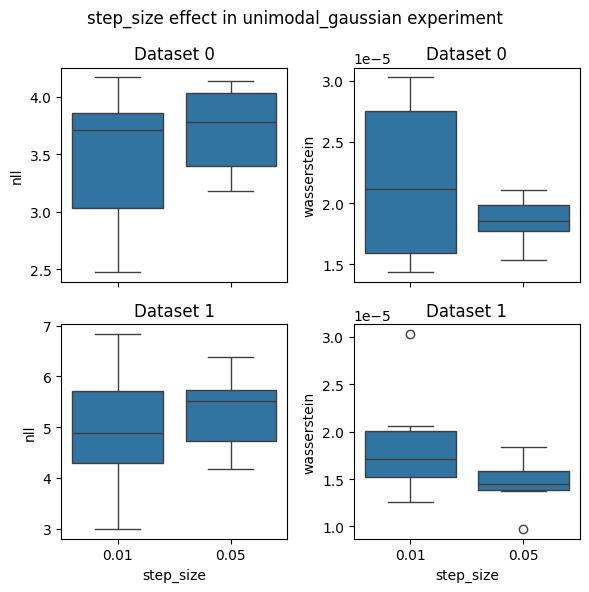

In [ ]:
parameter = "step_size"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

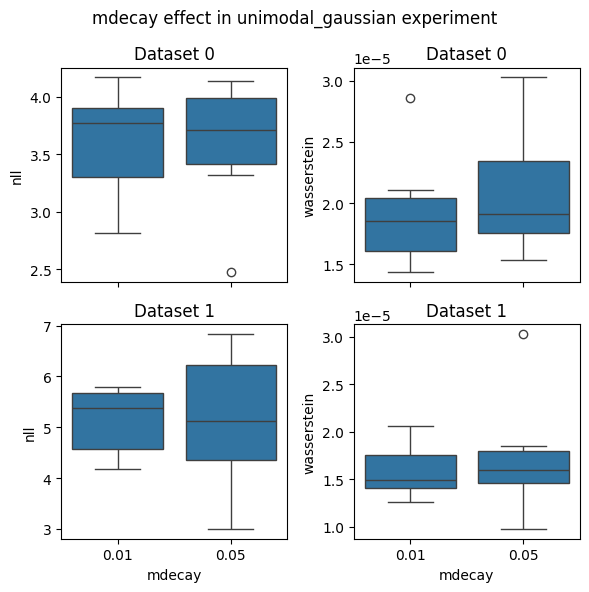

In [ ]:
parameter = "mdecay"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

The HPs have a interaction effect. For a larger step size (e.g. 0.05) a higher mdecay yields better metrics (lower wasserstein distance). While a smaller step size also requires a smaller mdecay. The overall metrics are better for the larger values, since they allow more exploration of the space. We also can see this effects when looking at the sampling trajectory through plots.

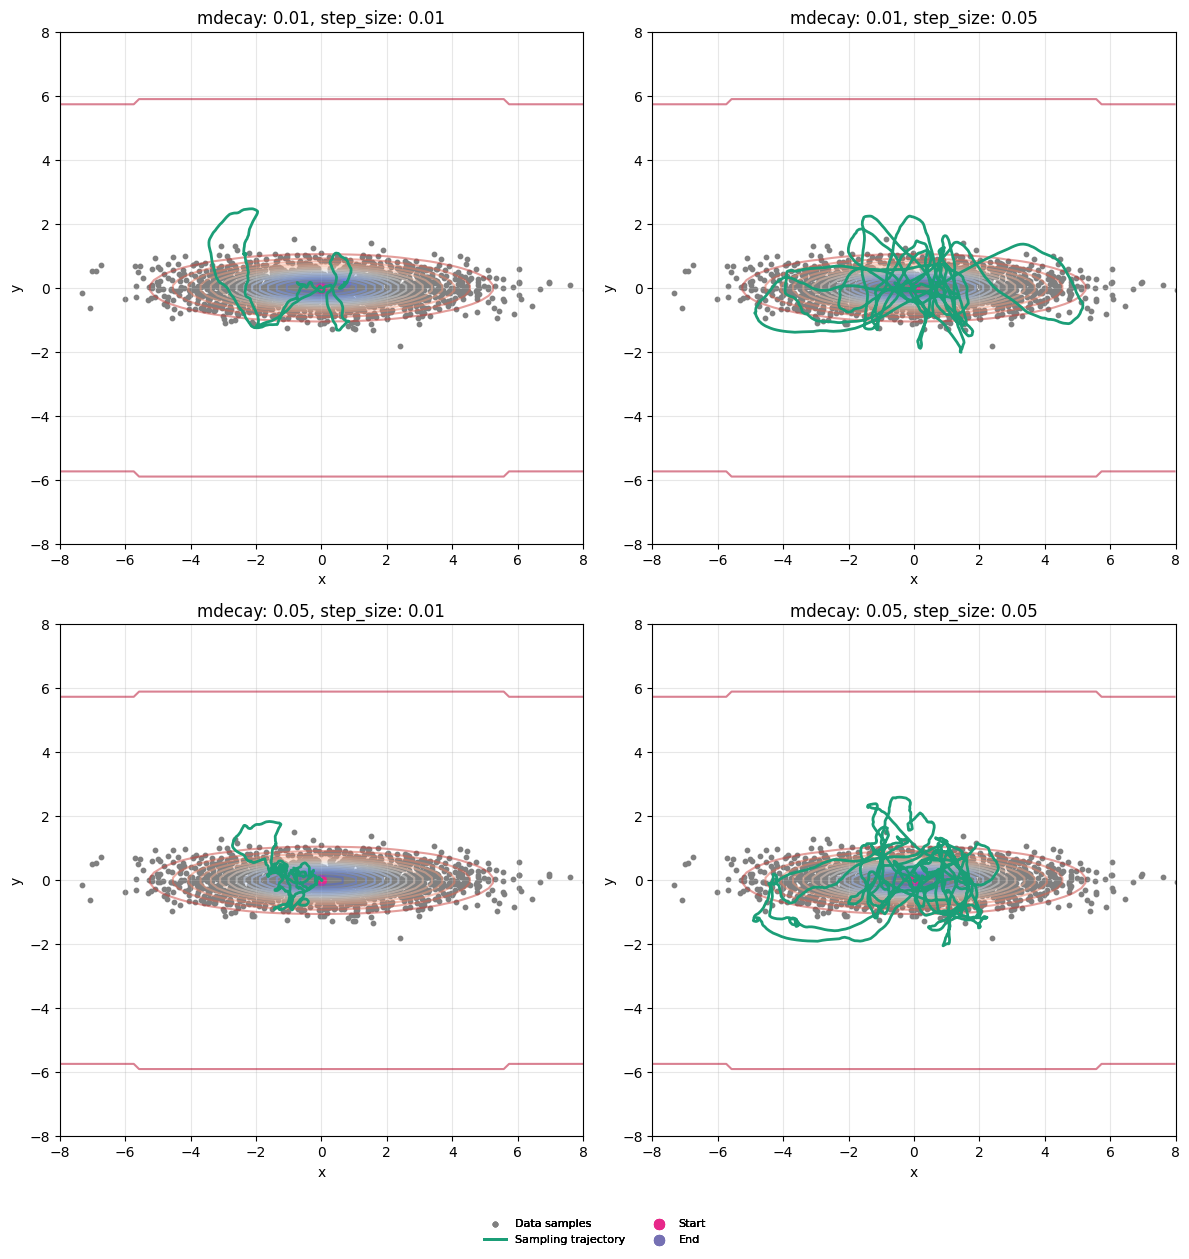

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

param_grid = list(
    product(
        [0.01, 0.05],
        [0.01, 0.05],
    )
)

axs_flat = axs.flatten()

for i, (mdecay, step_size) in enumerate(param_grid):
    data, trajectory = run_experiment(
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        data_samples=2000,
        mcmc_samples=2000,
        init_position=jnp.array([0.0, 0.0]),
        init_m="identity",
        mdecay=mdecay,
        step_size=step_size,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i // 2, i % 2],
        trajectory=trajectory,
        samples=data,
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        title=f"mdecay: {mdecay}, step_size: {step_size}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

## Effect of preconditioning

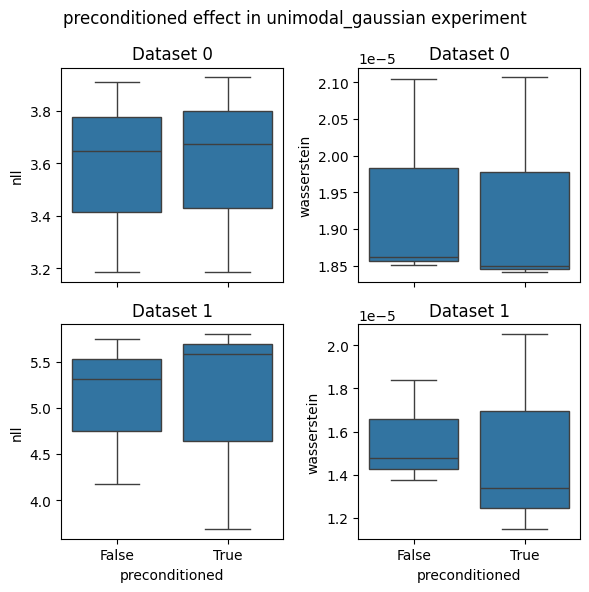

In [ ]:
parameter = "preconditioned"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"step_size": 0.05, "mdecay": 0.01},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

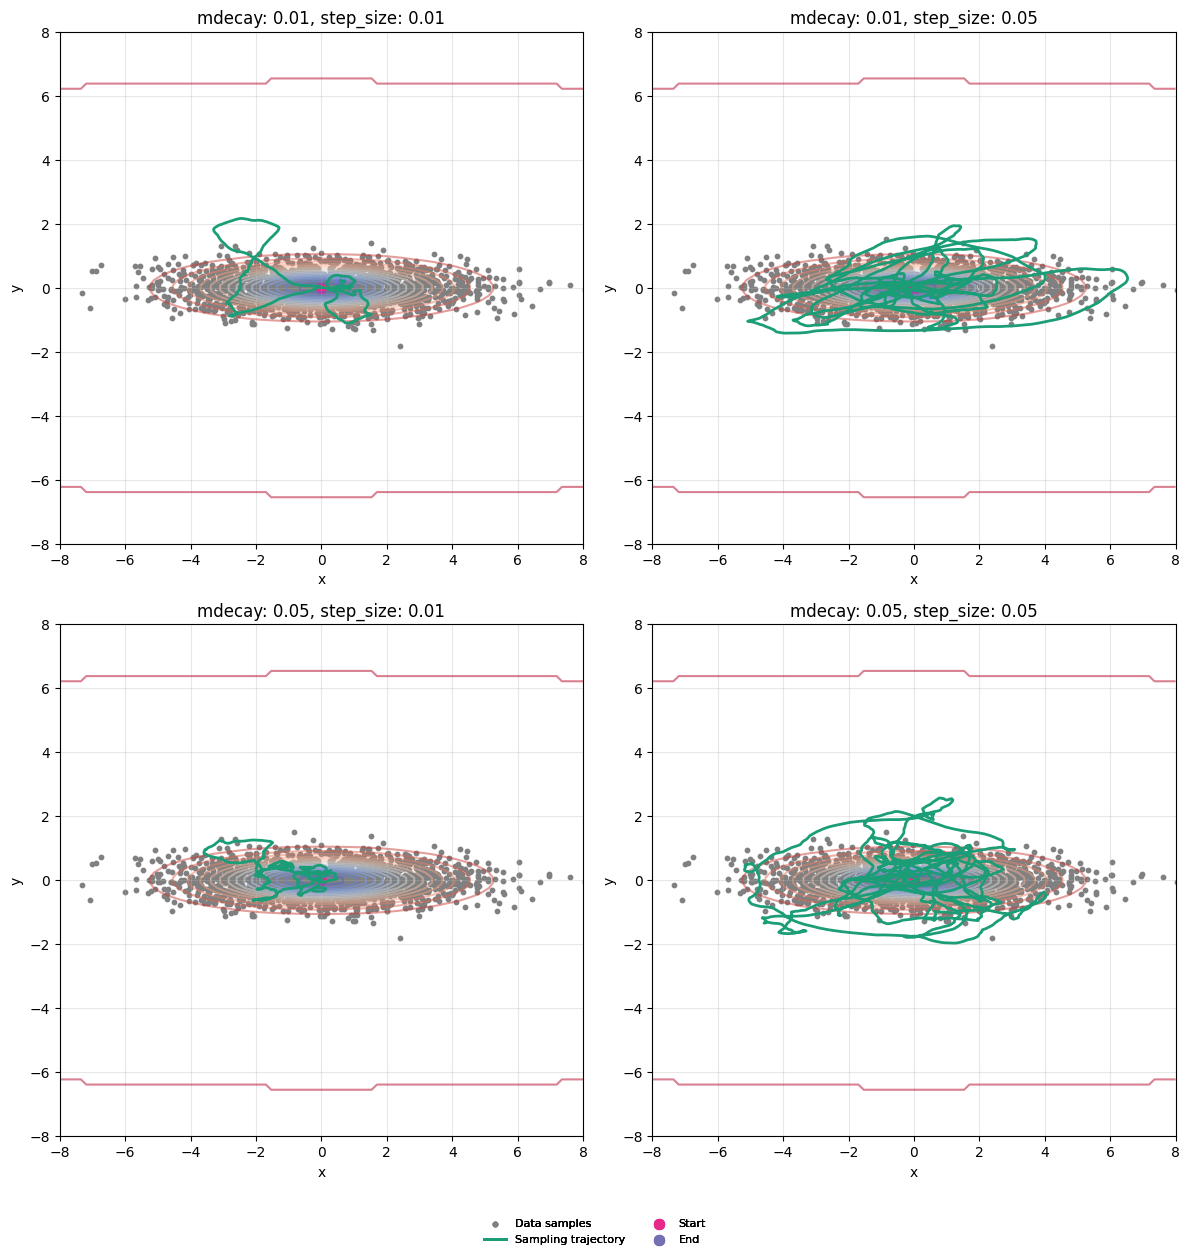

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

param_grid = list(
    product(
        [0.01, 0.05],
        [0.01, 0.05],
    )
)

axs_flat = axs.flatten()

for i, (mdecay, step_size) in enumerate(param_grid):
    data, trajectory = run_experiment(
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        data_samples=2000,
        mcmc_samples=2000,
        init_position=jnp.array([0.0, 0.0]),
        init_m="fisher",
        mdecay=mdecay,
        step_size=step_size,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i // 2, i % 2],
        trajectory=trajectory,
        samples=data,
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        title=f"mdecay: {mdecay}, step_size: {step_size}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

## Ill-Conditioned Gaussian
We conduct experiments with a ill-conditioned Gaussian ground truth we want to traverse with our MCMC sampler.

In [6]:
experiment_name = "illcond_gaussian"
df = load_experiment_data(experiment_name)

In [7]:
df

,data_config_id,experiment_id,experiment_name,seed,data_covs,data_means,data_num_samples,data_weights,burnin,init_m,...,mean_ess,mean_iact,min_ess,nll,wasserstein,results_plot_path,results_runtime_seconds,results_trajectory_path,file,preconditioned
0,0,20250504_234727,illcond_gaussian,1,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,7.438778,76.054764,4.902772,4.939999,0.000016,results\illcond_gaussian\data_7ffbed\1\2025050...,13.933182,results\illcond_gaussian\data_7ffbed\1\2025050...,results\illcond_gaussian\data_7ffbed\1\2025050...,False
1,0,20250504_234801,illcond_gaussian,1,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[0.40462496876716614, 0.9121907353401184]",...,8.104851,65.846123,6.068989,4.927374,0.000014,results\illcond_gaussian\data_7ffbed\1\2025050...,6.445468,results\illcond_gaussian\data_7ffbed\1\2025050...,results\illcond_gaussian\data_7ffbed\1\2025050...,True
2,0,20250504_234826,illcond_gaussian,2,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,7.607690,70.449005,5.637249,4.859403,0.000014,results\illcond_gaussian\data_7ffbed\2\2025050...,6.439359,results\illcond_gaussian\data_7ffbed\2\2025050...,results\illcond_gaussian\data_7ffbed\2\2025050...,False
3,0,20250504_234851,illcond_gaussian,2,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[0.4123334288597107, 0.9001185297966003]",...,9.071955,55.286537,8.566505,4.995979,0.000013,results\illcond_gaussian\data_7ffbed\2\2025050...,4.977959,results\illcond_gaussian\data_7ffbed\2\2025050...,results\illcond_gaussian\data_7ffbed\2\2025050...,True
4,0,20250504_234912,illcond_gaussian,3,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,7.662376,70.957504,5.489982,4.475591,0.000013,results\illcond_gaussian\data_7ffbed\3\2025050...,5.058661,results\illcond_gaussian\data_7ffbed\3\2025050...,results\illcond_gaussian\data_7ffbed\3\2025050...,False
5,0,20250504_234932,illcond_gaussian,3,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[0.4080592095851898, 0.9211112260818481]",...,9.361673,54.168625,8.253244,4.251402,0.000016,results\illcond_gaussian\data_7ffbed\3\2025050...,4.619175,results\illcond_gaussian\data_7ffbed\3\2025050...,results\illcond_gaussian\data_7ffbed\3\2025050...,True
6,0,20250504_234953,illcond_gaussian,4,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,6.733621,78.179359,5.224833,4.483355,0.000011,results\illcond_gaussian\data_7ffbed\4\2025050...,4.667526,results\illcond_gaussian\data_7ffbed\4\2025050...,results\illcond_gaussian\data_7ffbed\4\2025050...,False
7,0,20250504_235013,illcond_gaussian,4,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[0.39525148272514343, 0.9085114598274231]",...,7.792241,64.285461,7.456883,4.512583,0.000013,results\illcond_gaussian\data_7ffbed\4\2025050...,5.093069,results\illcond_gaussian\data_7ffbed\4\2025050...,results\illcond_gaussian\data_7ffbed\4\2025050...,True
8,0,20250504_235034,illcond_gaussian,5,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,8.184340,65.664459,6.024708,4.997653,0.000013,results\illcond_gaussian\data_7ffbed\5\2025050...,4.973267,results\illcond_gaussian\data_7ffbed\5\2025050...,results\illcond_gaussian\data_7ffbed\5\2025050...,False
9,0,20250504_235053,illcond_gaussian,5,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[0.4081478416919708, 0.917386531829834]",...,8.223022,68.047043,5.540394,4.992908,0.000013,results\illcond_gaussian\data_7ffbed\5\2025050...,4.799412,results\illcond_gaussian\data_7ffbed\5\2025050...,results\illcond_gaussian\data_7ffbed\5\2025050...,True


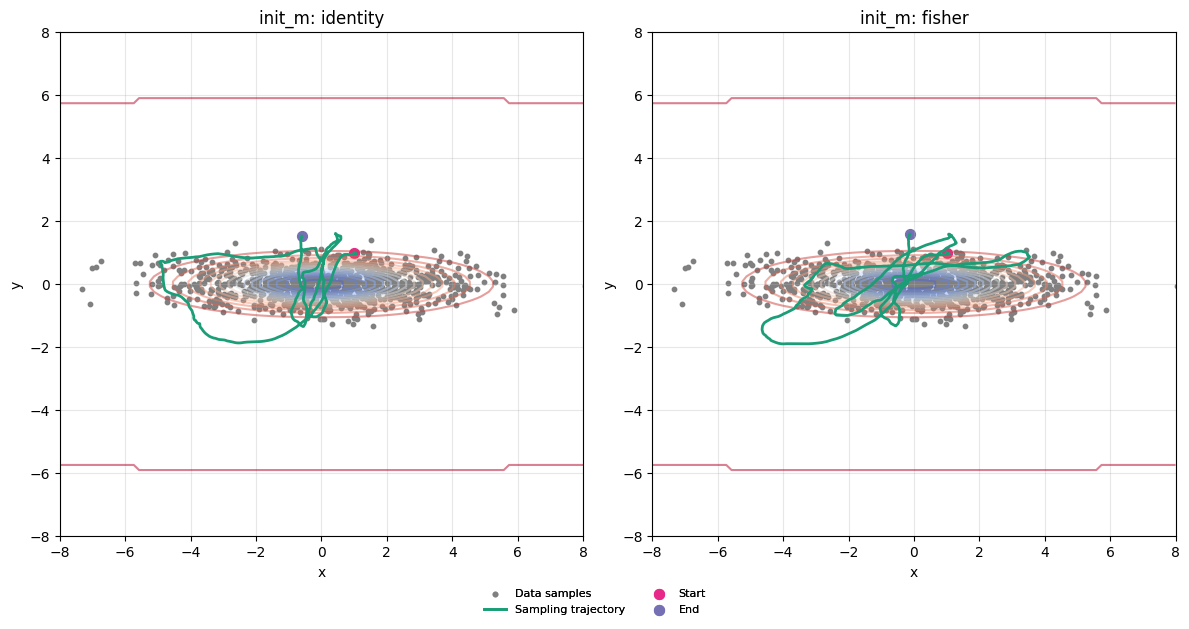

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, init_m in enumerate(["identity", "fisher"]):
    data, trajectory = run_experiment(
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        data_samples=1000,
        mcmc_samples=500,
        init_position=jnp.array([1.0, 1.0]),
        init_m=init_m,
        mdecay=0.02,
        step_size=0.05,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i],
        trajectory=trajectory,
        samples=data,
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        title=f"init_m: {init_m}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

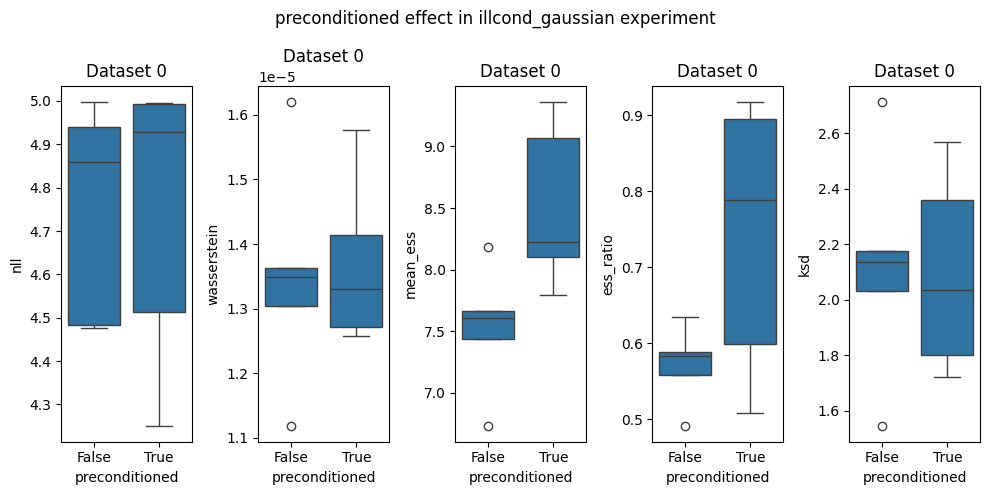

In [ ]:
parameter = "preconditioned"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein", "mean_ess", "ess_ratio", "ksd"],
    param=parameter,
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(10, 5),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

## Gaussian Mixture

 By not only testing the sampler on a single mode we can get a better understanding of its behavior in a more complex posterior distribution.

### Load data

In [12]:
experiment_name = "mixture_gaussian"
df = load_experiment_data(experiment_name)

In [20]:
means = jnp.array([[4, 4], [-4, 4], [-4, -4], [4, -4]])
covs = jnp.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
weights = jnp.array([0.25, 0.25, 0.25, 0.25])

In [14]:
df

,data_config_id,experiment_id,experiment_name,seed,data_covs,data_means,data_num_samples,data_weights,burnin,init_m,...,mresampling,n_batches,step_size,nll,wasserstein,results_plot_path,results_runtime_seconds,results_trajectory_path,file,preconditioned
0,1,20250426_073806,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.01,7.451699,2.269149e-06,results\mixture_gaussian\data_251a6b\1\2025042...,21.004151,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,False
1,1,20250426_073859,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.01,6.982079,3.948590e-06,results\mixture_gaussian\data_251a6b\1\2025042...,22.144119,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,False
2,1,20250426_073952,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.05,5.678156,4.292169e-06,results\mixture_gaussian\data_251a6b\1\2025042...,21.133310,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,False
3,1,20250426_074047,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.05,5.741798,3.516303e-06,results\mixture_gaussian\data_251a6b\1\2025042...,22.509874,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,False
4,1,20250426_074141,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[0.24129097163677216, 0.241314098238945]",...,0.0,5,0.01,6.164767,4.052154e-06,results\mixture_gaussian\data_251a6b\1\2025042...,21.601862,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,True
5,1,20250426_074234,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[0.24129097163677216, 0.241314098238945]",...,0.0,5,0.01,7.633506,1.662920e-06,results\mixture_gaussian\data_251a6b\1\2025042...,21.645319,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,True
6,1,20250426_074326,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[0.24129097163677216, 0.241314098238945]",...,0.0,5,0.05,5.471697,3.658791e-06,results\mixture_gaussian\data_251a6b\1\2025042...,20.429335,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,True
7,1,20250426_074420,mixture_gaussian,1,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[0.24129097163677216, 0.241314098238945]",...,0.0,5,0.05,5.211453,4.432729e-06,results\mixture_gaussian\data_251a6b\1\2025042...,22.139918,results\mixture_gaussian\data_251a6b\1\2025042...,results\mixture_gaussian\data_251a6b\1\2025042...,True
8,1,20250426_074512,mixture_gaussian,2,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.01,6.482414,1.970137e-06,results\mixture_gaussian\data_251a6b\2\2025042...,21.582002,results\mixture_gaussian\data_251a6b\2\2025042...,results\mixture_gaussian\data_251a6b\2\2025042...,False
9,1,20250426_074607,mixture_gaussian,2,"[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], ...","[[4, 4], [-4, 4], [-4, -4], [4, -4]]",2000,"[0.25, 0.25, 0.25, 0.25]",0,"[1.0, 1.0]",...,0.0,5,0.01,7.287753,1.402815e

## Hyperparameter Analysis

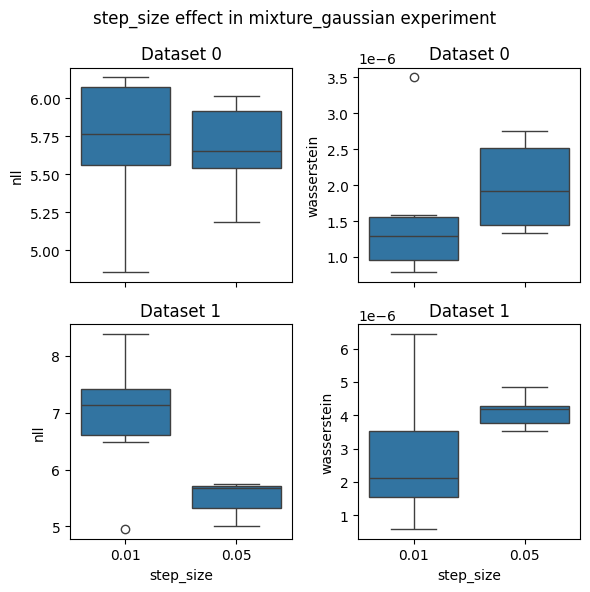

In [ ]:
parameter = "step_size"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

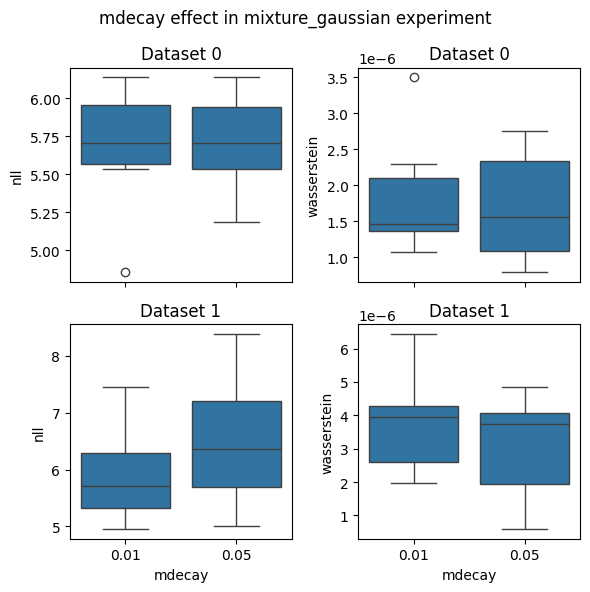

In [ ]:
parameter = "mdecay"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
)

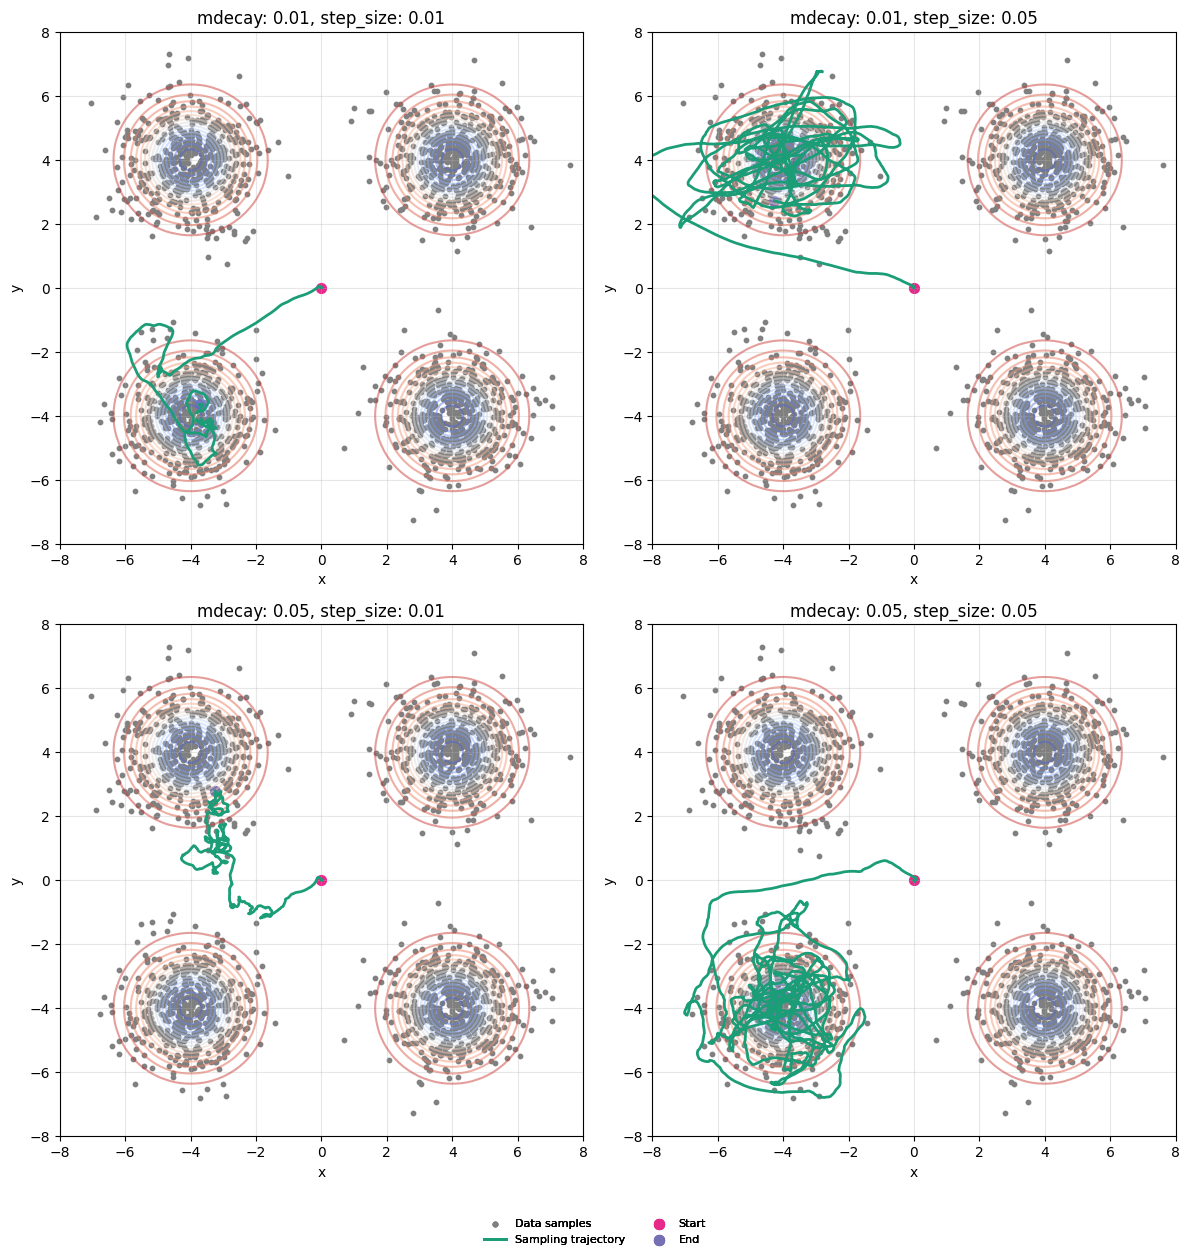

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

param_grid = list(
    product(
        [0.01, 0.05],
        [0.01, 0.05],
    )
)

axs_flat = axs.flatten()

for i, (mdecay, step_size) in enumerate(param_grid):
    data, trajectory = run_experiment(
        means=means,
        covs=covs,
        weights=weights,
        data_samples=2000,
        mcmc_samples=2000,
        init_position=jnp.array([0.0, 0.0]),
        init_m="identity",
        mdecay=mdecay,
        step_size=step_size,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i // 2, i % 2],
        trajectory=trajectory,
        samples=data,
        means=means,
        covs=covs,
        weights=weights,
        title=f"mdecay: {mdecay}, step_size: {step_size}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

## Effect of Preconditioning

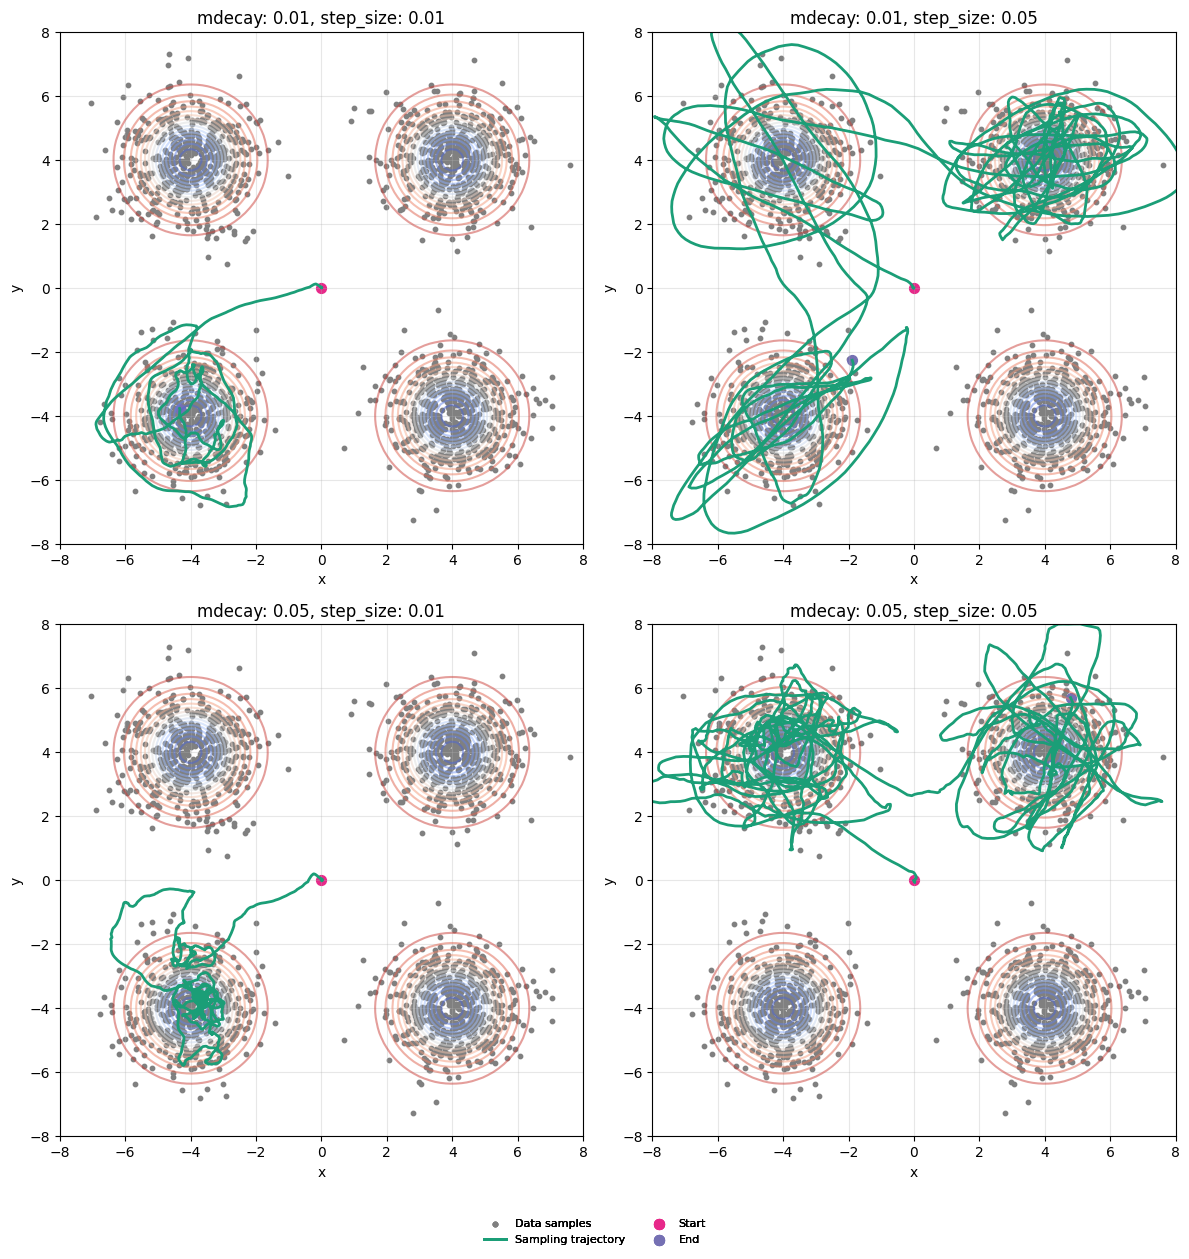

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

param_grid = list(
    product(
        [0.01, 0.05],
        [0.01, 0.05],
    )
)

axs_flat = axs.flatten()

for i, (mdecay, step_size) in enumerate(param_grid):
    data, trajectory = run_experiment(
        means=means,
        covs=covs,
        weights=weights,
        data_samples=2000,
        mcmc_samples=2000,
        init_position=jnp.array([0.0, 0.0]),
        init_m="fisher",
        mdecay=mdecay,
        step_size=step_size,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i // 2, i % 2],
        trajectory=trajectory,
        samples=data,
        means=means,
        covs=covs,
        weights=weights,
        title=f"mdecay: {mdecay}, step_size: {step_size}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

Preconditioning helps with exploring multiple modes and might therefore have advantages in traversing through a complex posterior landscape.